# Main module
It is written in Jupyter Noteboook for better look.

> **Note**: some functions from Utility.functions use ***frozendict*** module. To avoid errors and bad mood (bacause of errors) you need to create a cell with python code before any import and type `%pip install frozendict`. Then run your cell.

## Preparation

In [1]:
# Import some stuff for jupyter

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Import library modules

from binascii import crc32
import os.path
import warnings
import pickle

In [3]:
# Import project files

from Generate.generate import generate_dataset
from Classifier.learn import Classifier, make_classifier
from Classifier.score import stats
from Utility.test import run_all_tests
from Utility.functions import *
from Utility.data import *
from Encrypt import *

In [4]:
# Test helper functions
assert(run_all_tests())

All 6 tests passed
Time elapsed: 0:00:00.000127


In [5]:
# Disable annoying warnings in predictor
warnings.filterwarnings('ignore')

## Data preparation

In [6]:
words = generate_dataset(file_name)

Time elapsed: 0:00:00.267905


In [7]:
print("Set 'words' contains {} elements".format(len(words)))

Set 'words' contains 420372 elements


In [8]:
caesar_3 = caesar.encrypt(words, 3)
caesar_4 = caesar.encrypt(words, 4)
caesar_5 = caesar.encrypt(words, 5)

Time elapsed: 0:00:00.877780
Time elapsed: 0:00:00.832664
Time elapsed: 0:00:00.857743


In [9]:
affine_3_4  = affine.encrypt(words, 3, 4)
affine_5_2  = affine.encrypt(words, 5, 2)
affine_9_11 = affine.encrypt(words, 9, 11)

Time elapsed: 0:00:00.844401
Time elapsed: 0:00:00.900340
Time elapsed: 0:00:00.854116


## First look

Here we need to find out some things, which can be helpful for classification.

In [10]:
intersections = list()

# caesar 3 and caesar 4
put_card_of_intersection_to(intersections, caesar_3, caesar_4)       # (1)
# caesar 3 and caesar 5
put_card_of_intersection_to(intersections, caesar_3, caesar_5)       # (2)
# caesar 3 and affine 3 4
put_card_of_intersection_to(intersections, caesar_3, affine_3_4)     # (3)
# caesar 3 and affine 5 2
put_card_of_intersection_to(intersections, caesar_3, affine_5_2)     # (4)
# caesar 3 and affine 9 11
put_card_of_intersection_to(intersections, caesar_3, affine_9_11)    # (5)

# caesar 4 and caesar 5
put_card_of_intersection_to(intersections, caesar_4, caesar_5)       # (6)
# caesar 4 and affine 3 4
put_card_of_intersection_to(intersections, caesar_4, affine_3_4)     # (7)
# caesar 4 and affine 5 2
put_card_of_intersection_to(intersections, caesar_4, affine_5_2)     # (8)
# caesar 4 and affine 9 11
put_card_of_intersection_to(intersections, caesar_4, affine_9_11)    # (9)

# caesar 5 and affine 3 4
put_card_of_intersection_to(intersections, caesar_5, affine_3_4)     # (10)
# caesar 5 and affine 5 2
put_card_of_intersection_to(intersections, caesar_5, affine_5_2)     # (11)
# caesar 5 and affine 9 11
put_card_of_intersection_to(intersections, caesar_5, affine_9_11)    # (12)

# affine 3 4 and affine 5 2
put_card_of_intersection_to(intersections, affine_3_4, affine_5_2)   # (13)
# affine 3 4 and affine 9 11
put_card_of_intersection_to(intersections, affine_3_4, affine_9_11)  # (14)

# affine 5 2 and affine 9 11
put_card_of_intersection_to(intersections, affine_5_2, affine_9_11)  # (15)

#### Results visualization

In [11]:
# First graph stuff

x_axis = [i+1 for i in range(len(intersections))]  # Range to plot
l_threshold = 1800                                 # Lower bound of 'weak' intersction
u_threshold = 2400                                 # Upper bound of 'medium' intersection
l_threshold_line = [l_threshold for i in range(len(x_axis))]  # Line to display lower bound
u_threshold_line = [u_threshold for i in range(len(x_axis))]  # Line to display upper bound

# Second graph stuff

# Here I replace self-intersections (HUGE cardinality) with placeholder.
# Graph is symmetrical against y = x line, hence we don't need to draw one half.
placeholder = 1200
intersections_map = [
      [intersections[4], intersections[8], intersections[11]
       , intersections[13], intersections[14], placeholder]
    , [intersections[3], intersections[7], intersections[10]
       , intersections[12], placeholder, placeholder]
    , [intersections[2], intersections[6], intersections[9]
       , placeholder, placeholder, placeholder]
    , [intersections[1], intersections[5], placeholder
       , placeholder, placeholder, placeholder]
    , [intersections[0], placeholder, placeholder
       , placeholder, placeholder, placeholder]
    , [placeholder, placeholder, placeholder
       , placeholder, placeholder, placeholder]
]
labels = [key for key in classes_map.keys()]

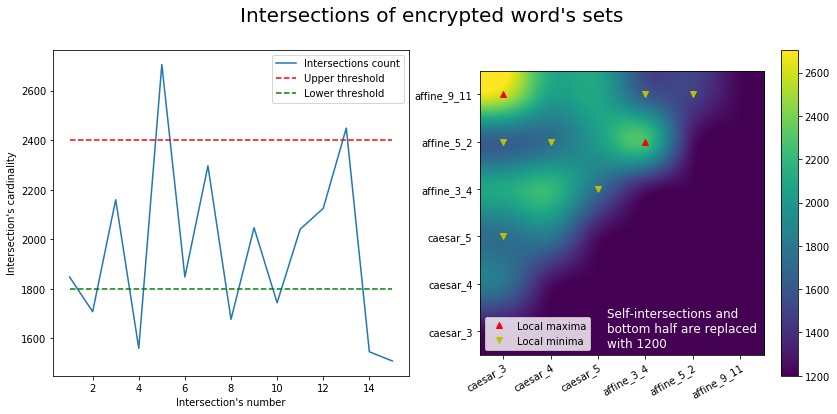

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


# Plotting graph of intersection's cardinalities
ax1.set_xlabel("Intersection's number")
ax1.set_ylabel("Intersection's cardinality")

ax1.plot(x_axis, intersections, label='Intersections count')
ax1.plot(x_axis, u_threshold_line, 'r--', label='Upper threshold')
ax1.plot(x_axis, l_threshold_line, 'g--', label='Lower threshold')

# Plotting colored image of inersection's cardinalities 
ax2.set_xticklabels([0] + [label for label in labels])  # 0 is dummy label
ax2.set_yticklabels([0] + [label for label in reversed(labels)])

pos = ax2.imshow(intersections_map, interpolation='mitchell')

# Mark local minima and maxima on second graph
# It is sad, but these numbers are magical :(
ax2.plot(  0, 0, 'r^', label='Local maxima')
ax2.plot(  3, 1, 'r^')
ax2.plot(  0, 3, 'yv', label='Local minima')
ax2.plot(  0, 1, 'yv', 1, 1, 'yv', 2, 2, 'yv'
         , 3, 0, 'yv', 4, 0, 'yv')


# Draw plots
fig.colorbar(pos, ax=ax2)

plt.suptitle("Intersections of encrypted word's sets", size=20)
plt.setp(ax2.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')

ax1.legend()
ax2.legend(loc='lower left')

ax2.text(2.20, 5.35
         , 'Self-intersections and \nbottom half are replaced \nwith {}'.format(placeholder)
         , color='white', size=12)

plt.show()

#### Some inferences

As we can see on first graph, the most different sets are given by following methods:
- caesar_3 and caesar_5 (intersection 2)
- caesar_3 and affine_5_2 (intersection 4)
- caesar_4 and affine_5_2 (intersection 8)
- caesar_5 and affine_3_4 (intersection 10)
- affine_3_4 and affine_9_11 (intersection 14)
- affine_5_2 and affine_9_11 (intersection 15)

These intersections are marked with <span style='color:green'>▼</span> sign on the second graph as local minima.

From the first graph ensue that we have two intersections with relatively big cardinality:
- caesar_3 and affine_9_11 (intersection 5)
- affine_3_4 and affine_5_2 (intersection 13)

They are highlighted with <span style='color:red'>▲</span> sign on the second graph.

## Some hypotheses

There are different ways to build classifier:

- try to calculate some unique number for each word
and build classifier based on these numbers

- vectorize words and build classifier based on vectors

### <span style='color:red'>Number's calculation</span>

We have calculated 2 hash values: crc32 and custom one. Now it's time to visualize some intersections to find out if it is possible to classify words by these numbers.

In [13]:
d_caesar_3 = map_codes_and_words(caesar_3, crc32, custom_hash)
d_caesar_4 = map_codes_and_words(caesar_4, crc32, custom_hash)
d_caesar_5 = map_codes_and_words(caesar_5, crc32, custom_hash)

Time elapsed: 0:00:02.180262
Time elapsed: 0:00:02.134690
Time elapsed: 0:00:02.161881


In [14]:
d_affine_3_4  = map_codes_and_words(affine_3_4, crc32, custom_hash)
d_affine_5_2  = map_codes_and_words(affine_5_2, crc32, custom_hash)
d_affine_9_11 = map_codes_and_words(affine_9_11, crc32, custom_hash)

Time elapsed: 0:00:02.160401
Time elapsed: 0:00:02.081319
Time elapsed: 0:00:02.357230


In [15]:
# Let's choose n random items from dictionaries
n = 20

n_rand_caesar_3 = get_n_random(n, d_caesar_3)
n_rand_caesar_4 = get_n_random(n, d_caesar_4)
n_rand_caesar_5 = get_n_random(n, d_caesar_5)
n_rand_affine_3_4 = get_n_random(n, d_affine_3_4)
n_rand_affine_5_2 = get_n_random(n, d_affine_5_2)
n_rand_affine_9_11 = get_n_random(n, d_affine_9_11)

Time elapsed: 0:00:00.251786
Time elapsed: 0:00:00.216280
Time elapsed: 0:00:00.237262
Time elapsed: 0:00:00.225126
Time elapsed: 0:00:00.238805
Time elapsed: 0:00:00.225058


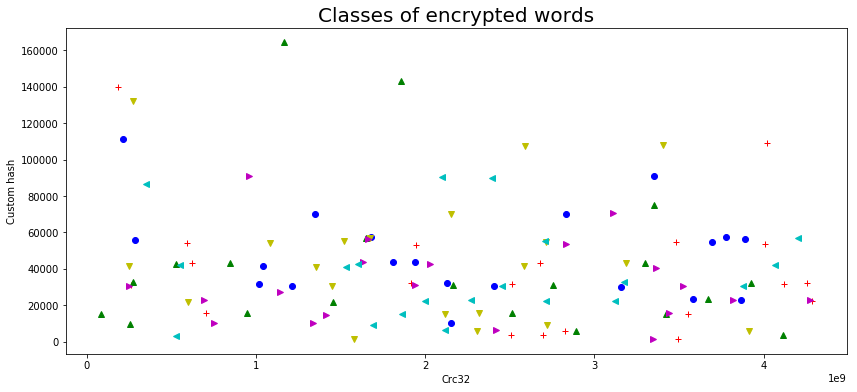

In [16]:
# Visualize classes

plt.figure(figsize=(14, 6))
plt.title('Classes of encrypted words', size=20)
plt.xlabel('Crc32')
plt.ylabel('Custom hash')

for value in n_rand_caesar_3.values():
    plt.plot([value[0]], [value[1]], 'r+')
for value in n_rand_caesar_4.values():
    plt.plot([value[0]], [value[1]], 'bo')
for value in n_rand_caesar_5.values():
    plt.plot([value[0]], [value[1]], 'g^')
for value in n_rand_affine_3_4.values():
    plt.plot([value[0]], [value[1]], 'yv')
for value in n_rand_affine_5_2.values():
    plt.plot([value[0]], [value[1]], 'm>')
for value in n_rand_affine_9_11.values():
    plt.plot([value[0]], [value[1]], 'c<')
    
plt.show()

#### Further inferences

As we can see from a graph, there is nothing to classify according to some hash-values. It was predictable: usually good hash functions for close arguments give values, which are far away from each other on the number line. It is a reason, why our first hypothesis was wrong. We need some function `f`, which gives close values for close arguments. It is a topic of further research.

### <span style='color:red'>Vectorization</span>

We have n letters in our alphabet (26 in english alphabet). We can use it as a basis in n-dimensional vector space. Each letter will increment corresponding coordinate (it causes one problem - anagrams will have the same vector, for instance 'mean' and 'name'). It is 'One Hot Encoding' strategy.

In [17]:
# Now it is more comfortable to work with list of dictionaries
ciphers = [caesar_3, caesar_4, caesar_5, affine_3_4, affine_5_2, affine_9_11]

In [18]:
# Here we need to throw away the most of words, because of technial reasons
to_remain = 3000

small_dicts = [get_n_random(to_remain, cipher_dict) for cipher_dict in ciphers]

Time elapsed: 0:00:00.109279
Time elapsed: 0:00:00.108626
Time elapsed: 0:00:00.104073
Time elapsed: 0:00:00.103666
Time elapsed: 0:00:00.105703
Time elapsed: 0:00:00.111455


In [19]:
# Check amount of words in each dictionary
for cipher_dict in small_dicts:
    assert(len(cipher_dict) == to_remain)

#### Preparation for vectorization

In [20]:
vect_alphabet = tuple(alphabet)

In [21]:
mapped_alphabet = map_to_numbers(0, *vect_alphabet)

In [22]:
# Let's vectorize our words

v_ciphers = [vectorize(cipher_dict, mapped_alphabet) for cipher_dict in small_dicts]

Time elapsed: 0:00:00.010303
Time elapsed: 0:00:00.009621
Time elapsed: 0:00:00.010010
Time elapsed: 0:00:00.010129
Time elapsed: 0:00:00.009472
Time elapsed: 0:00:00.009689


In [23]:
# Now prepare data to putting into a Pandas DataFrame

mapped_dicts = map_to_numbers(1, *v_ciphers)

In [24]:
# And... Put all data to DataFrame

data_frame = create_data_frame_vectorized(mapped_dicts)
len(data_frame)

Time elapsed: 0:00:00.142441


18000

In [25]:
data_frame

,Word,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,Class
0,mdflqwk,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,vrpdwrghup,0,0,0,1,0,0,1,1,0,...,2,0,0,1,1,1,0,0,0,1
2,fdsulfflrv,0,0,0,1,0,3,0,0,0,...,1,1,0,1,1,0,0,0,0,1
3,fkhydolhu,0,0,0,1,0,1,0,2,0,...,0,0,0,1,0,0,0,1,0,1
4,judqlwholnh,0,0,0,1,0,0,0,2,0,...,0,0,0,1,0,1,0,0,0,1
5,qrqfodvvdeoh,0,0,0,2,1,1,0,1,0,...,1,0,0,0,2,0,0,0,0,1
6,dqflhqwhu,0,0,0,1,0,1,0,2,0,...,0,0,0,1,0,1,0,0,0,1
7,dskhpld,0,0,0,2,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
8,sdvvlrq,0,0,0,1,0,0,0,0,0,...,1,1,0,0,2,0,0,0,0,1
9,glvsulvrq,0,0,0,0,0,0,1,0,0,...,1,1,0,1,2,0,0,0,0,1


### Building a model

#### Data preparation

In [26]:
# It is a table we will work with

df = data_frame.drop('Word', axis=1)
df.head()

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,Class
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,1,0,0,...,2,0,0,1,1,1,0,0,0,1
2,0,0,0,1,0,3,0,0,0,0,...,1,1,0,1,1,0,0,0,0,1
3,0,0,0,1,0,1,0,2,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,0,1,0,0,0,2,0,1,...,0,0,0,1,0,1,0,0,0,1


In [27]:
X = df.drop('Class', axis=1)
y = df['Class']

In [28]:
assert(len(X) == len(y))

#### Building a model

Building is extremely long process (may take about 20 minutes), but if we have learned a model already, we can load it easily from binary file! If file is abcent, we create new model and save it.

In [29]:
classifier = make_classifier(X, y, predictor_path)

Read from ./data/Predictor.pickle
Time elapsed: 0:00:00.039946


#### Testing

In [30]:
n = 25

tests = [get_n_random(n, cipher_dict) for cipher_dict in ciphers]

Time elapsed: 0:00:00.141949
Time elapsed: 0:00:00.120027
Time elapsed: 0:00:00.099692
Time elapsed: 0:00:00.103504
Time elapsed: 0:00:00.108871
Time elapsed: 0:00:00.109015


In [31]:
for index, test in enumerate(tests):
    predictions = classifier.predict(list(test.values()))
    right_value = index + 1
    print(
        "Should be {}: {}. {}".format(right_value, predictions
                                      , stats(right_value, list(predictions)))
    )

Should be 1: [3 5 1 1 1 1 1 6 1 1 1 1 1 5 1 1 1 1 1 1 1 5 1 1 3]. Errors: 6. Percentage: 76.0
Should be 2: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 4 2 2 2 5 2 2]. Errors: 3. Percentage: 88.0
Should be 3: [3 3 3 3 3 6 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3]. Errors: 2. Percentage: 92.0
Should be 4: [1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]. Errors: 1. Percentage: 96.0
Should be 5: [5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 3 6 3 5 5 5 3 5 5 5]. Errors: 5. Percentage: 80.0
Should be 6: [6 6 6 6 2 6 6 6 6 6 6 6 6 6 6 1 1 6 6 6 1 6 6 6 6]. Errors: 4. Percentage: 84.0


## Brief conclusion

We can see: it is possible to classify encrypted words by their encryption method. I will continue my research: nowadays I look at classifiers based on neural networks. Reason for continuation is following: current model is not enough accurate: in general it classifies right about 20% of encrypted words, but it is my first attempt to achieve my target - to build classifier, which will have at least 50% answer hit. Maybe it is impossible for some mathematical reasuns; if it is, I'd prove it mathematically and practically.

But for today you can look, how currently built model decrypts some words below:

In [32]:
# Choose 10 random words
demo = dict()
for cipher_dict in ciphers:
    demo = dict(demo, **get_n_random(5, cipher_dict))
    
demo = swap_keys_and_values(get_n_random(10, demo))

Time elapsed: 0:00:00.143394
Time elapsed: 0:00:00.117932
Time elapsed: 0:00:00.101009
Time elapsed: 0:00:00.100715
Time elapsed: 0:00:00.100225
Time elapsed: 0:00:00.101953
Time elapsed: 0:00:00.000046


In [33]:
show_demo(demo, classifier)

'ypofczzwr' decrypted to 'unslapped'.
Original: 'unslapped'

'mvlglugv' decrypted to 'dealable'.
Original: 'dealable'

'limqhep' decrypted to 'heimdal'.
Original: 'heimdal'

'ntpplg' decrypted to 'gymmal'.
Original: 'gymmal'

'gqlqmkcer' decrypted to 'seleucian'.
Original: 'seleucian'

'gcwrqj' decrypted to 'signet'.
Original: 'signet'

'osptwfukw' decrypted to 'syntelome'.
Original: 'syntelome'

'spmksglixi' decrypted to 'oligochete'.
Original: 'oligochete'

'wjhjqjgwfynsl' decrypted to 'recelebrating'.
Original: 'recelebrating'

'hitspevmwi' decrypted to 'depolarise'.
Original: 'depolarise'

